# Data #

## Displaying Data ##

The ability to display data is often an important first step in understanding them. Producing clear and understandable (appropriately labelled, legible etc) plots is an important part of communicating your results to others. You will predominently, although not exclusively, be using matplotib to produce plots. The aim of this section is to make sure that you are completely happy with the different ways of displaying data. Consider and run the  following very simple example.

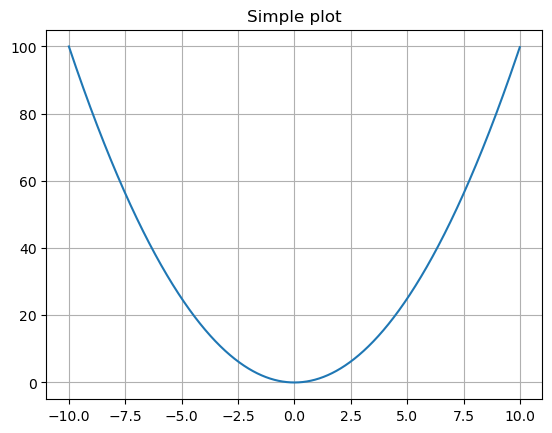

In [1]:
import numpy as np
import pylab as pl # one of the several ways of importing matplotlib

x= np.arange(-10,10,0.01)
y=x*x

pl.plot(x,y)
pl.grid()
pl.title("Simple plot")

pl.show()

### Exercise 1. ###

The purpose of this exercise is to make sure that you are familiar with the display options in matplotlib and can make professional looking plots. You you perform the assignments at the end of two weeks this is one of the things that you will be judged upon. 

Create a graph of a $y=\sin^2(x)$ going from $-2\pi$ to $+2\pi$ (and no further). Make sure that the axes are labelled as $x$ and $y$ and that the equation is written as legend on this graph. Change the $x-axis$ tick marks to be multiples of $\frac{\pi}{4}$ and labelled appropriately. Add a grid to this plot and finally add a graph of $y=\cos^{100}(x)$ as a dotted red line with appropriate legend. Make sure that your plot is a decent size to be easily readable and save the complete plot to a file.

## Displaying multiple plots ##

It is often useful to display multiple plots side by side or one above another. This can be done relatively simply in matplotlib consider the example below. 

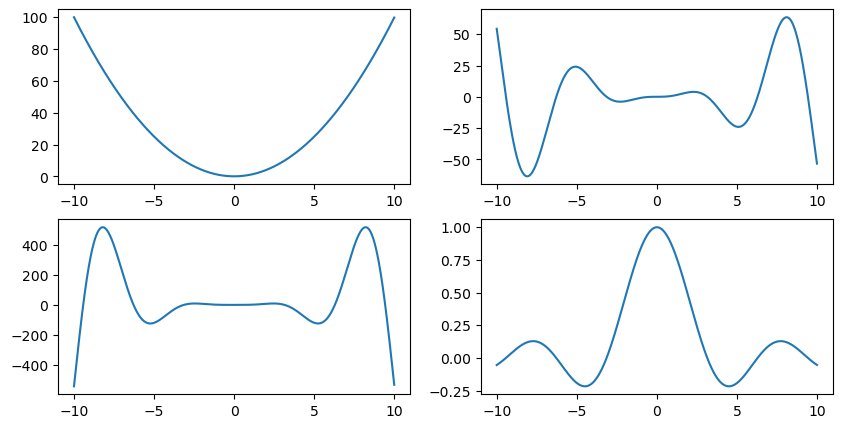

In [2]:
import numpy as np
import pylab as pl

pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

pl.subplot(2,2,1)
pl.plot(x,y1)

pl.subplot(2,2,2)
pl.plot(x,y2)

pl.subplot(2,2,3)
pl.plot(x,y3)

pl.subplot(2,2,4)
pl.plot(x,y4)

pl.show()




However, while these defaults are useful they are not always ideal. Consider the example below where we have tried to put axis labels on the second plot. The $y$ label has overwritten the first plot (OK the font was chosen to be large to make this point) and the $x$ is completely lost under the 4th plot (if you want to check that it is actually there then comment out the commands that draw the 4th plot. i.e.

```python
#pl.subplot(2,2,4)
#pl.plot(x,y4)
```


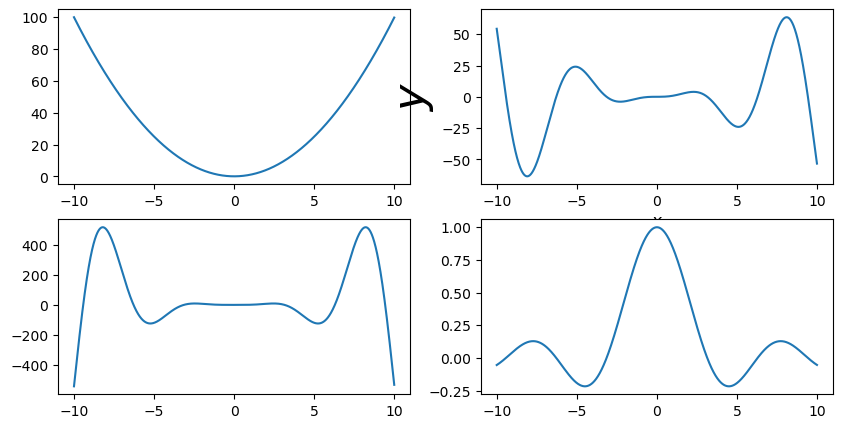

In [3]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

pl.subplot(2,2,1)
pl.plot(x,y1)

pl.subplot(2,2,2)
pl.plot(x,y2)
pl.xlabel("$x$",fontsize=12)
pl.ylabel("$y$",fontsize=32)

pl.subplot(2,2,3)
pl.plot(x,y3)

pl.subplot(2,2,4)
pl.plot(x,y4)

pl.show()




While this particular problem is quite easy to fix then by itself it probably makes sense to learn a little more about how matplotlib works. The basis on which matplotlib draws id the figure -- this is the canvas on which you can draw. When you have multiple plots on the same figure it must be divided up into "axes".  Once you have a figure you can put an axis wherever you want for example:

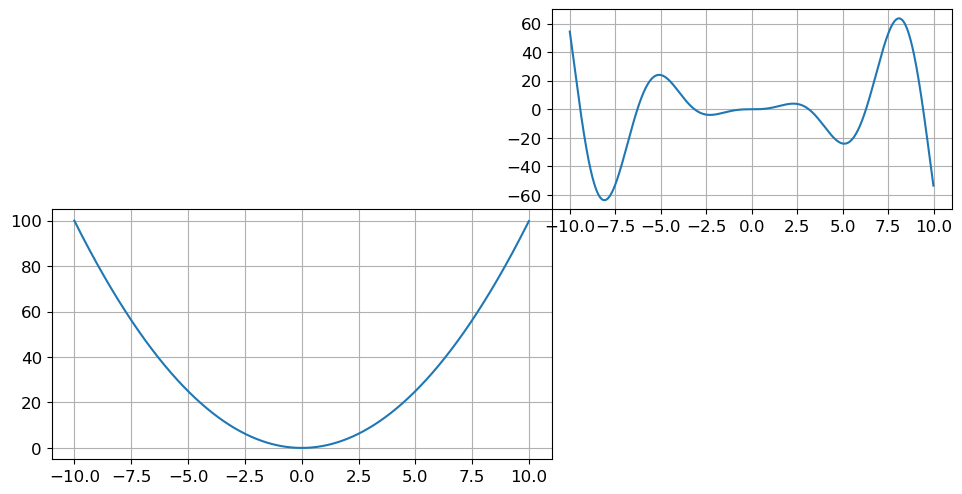

In [4]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize'] = [10, 5] 

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

fig=pl.figure("New Figure")

ax=fig.add_axes([0.1, 0.1, 0.5, 0.5]) # [x0,y0,width,height]
ax.plot(x,y1)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid()


ax1=fig.add_axes([.6, .6, .4, 0.4]) # [x0,y0,width,height]
ax1.plot(x,y2)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.grid()



pl.savefig("axes_plots.png")

pl.show()

You will notice that the $x$ and $y$ tick labels lie outside of the axis area. Also if you look at axes_plots.png you will notice that the very right hand edge of the second plot is missing.

This approach gives you complete flexibility as to where to place plots on your figures and can be very useful. For example it easily allows you to have plots inside each other perhaps showing detail. Consider the following:

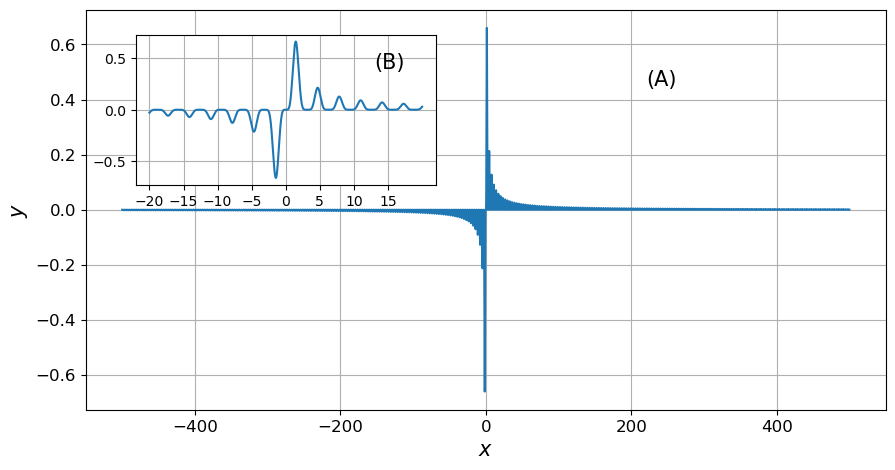

In [5]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize'] = [10, 5] 

x=np.arange(-500,500,0.001)

y4=np.sin(x)**6/x

fig=pl.figure("New Figure")

ax=fig.add_axes([0.05, 0.1, 0.8, 0.8]) # [x0,y0,width,height]
ax.plot(x,y4)
pl.xlabel("$x$",fontsize=15)
pl.ylabel("$y$",fontsize=15)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.text(220,0.45,"(A)", fontsize=15)
pl.grid()


ax1=fig.add_axes([.1, .55, .3, 0.3]) # [x0,y0,width,height]
ax1.plot(x[480000:520000],y4[480000:520000]) # clearly there are more elogant ways of doing this
pl.xticks(np.arange(-20,20,5),fontsize=10)
pl.yticks(fontsize=10)
pl.text(13,0.4,"(B)", fontsize=15)
pl.grid()



pl.savefig("inset_plots.png")

pl.show()

As we have seen you can also use subplots, so another way to draw the four plots that we had earlier would be the following:

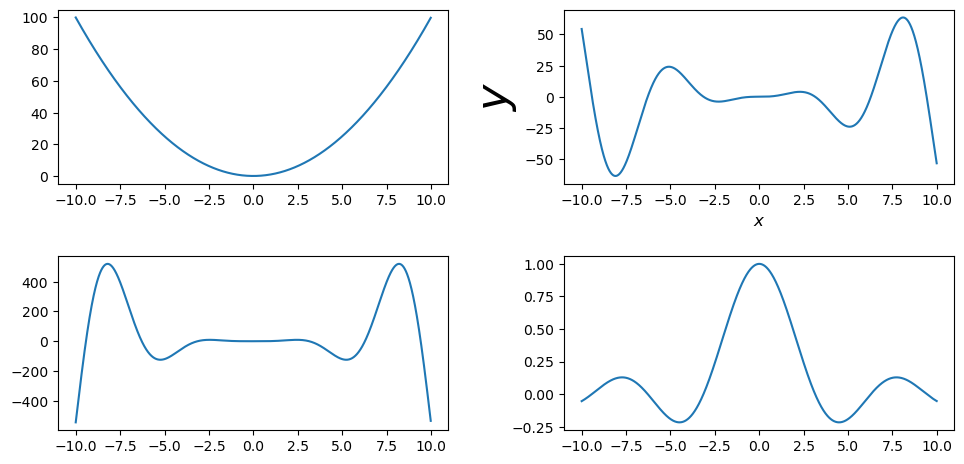

In [6]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

#define the subplots
fig, axes = pl.subplots(nrows=2, ncols=2)

#now plot
axes[0,0].plot(x,y1)
axes[0,1].plot(x,y2)
axes[1,0].plot(x,y3)
axes[1,1].plot(x,y4)

pl.subplot(2,2,2)
pl.ylabel("$y$", fontsize=32)
pl.xlabel("$x$",fontsize="12")

# but now can change the padding between the plots as we have the figure defined
fig.tight_layout(pad=2.0)

pl.show()


Having the figure defined gives us more flexibilty. For example:

/var/folders/36/v4thfyh9649fpc6hvhqh04fc0000gn/T/ipykernel_85574/3373413055.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=2.0)


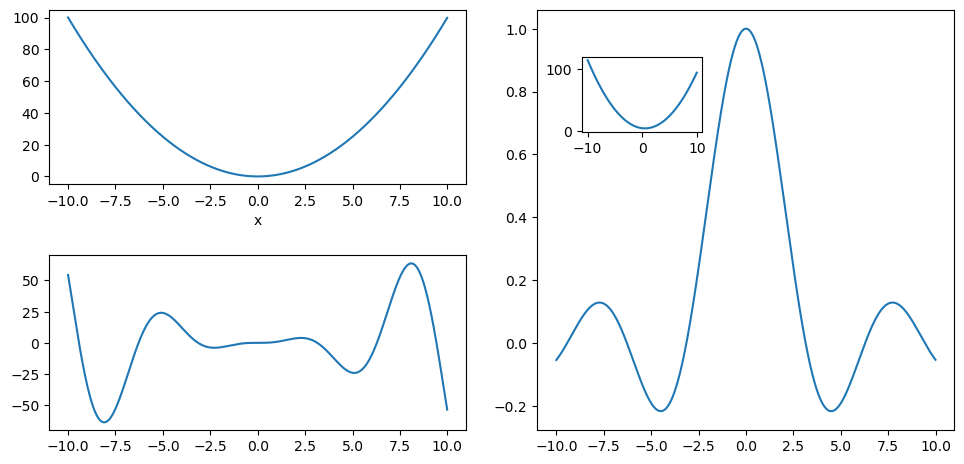

In [7]:
import numpy as np
import pylab as pl

x=np.arange(-10,10,0.01)
y1=x*x
y2=x*x*np.sin(x)
y3=x*x*x*np.sin(x)
y4=np.sin(x)/x

fig=pl.figure()

pl.subplot(2,2,1)
pl.plot(x,y1)
pl.xlabel("x")
pl.subplot(2,2,3)
pl.plot(x,y2)
pl.subplot(1,2,2)
pl.plot(x,y4)

ax=fig.add_axes([0.6,0.7,0.12,0.15])
ax.plot(x,x*x-x+4)



fig.tight_layout(pad=2.0) 
# this will generate a warning as the inset plot is not compatible with tight_layout but it will work 
#for the subplots.

pl.show()



### Exercise 2 ###

The purpose of this exercise is to make sure that you are familiar with all these plotting options. Pick 6 different functions of x (the actual functions don't matter for this exercise). Plot them in different configurations, orientatios etc. Draw some so that they have a shared $x-axis$ and $y-axis$ for example. This exercise will seem trivial after reading through the examples above but do try to do a good and detailed job of it. Practise now will save you time later as you wont have to look it up later.

### Histogramming data

When carrying out data science you will often need to histogram data. This is easy with matplotlib consider the following:

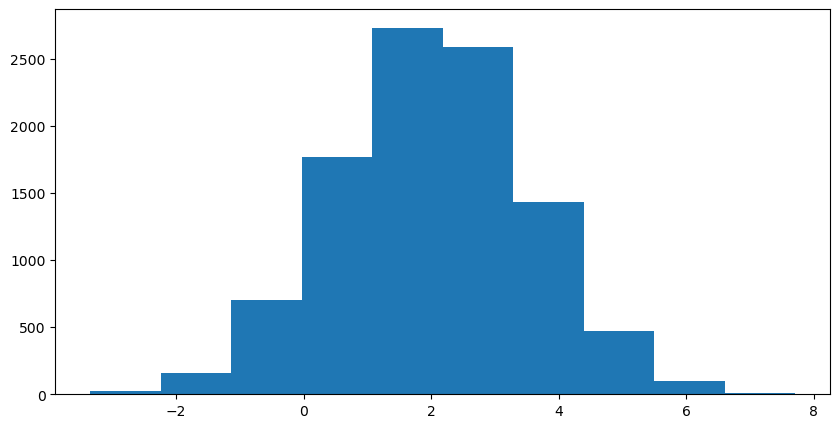

In [8]:
import numpy as np
import numpy.random as npr
import pylab as pl


x_data=npr.normal(loc=2,scale=1.5,size=10000) # this will generate a gaussian distribution - we will do more on these later.

pl.hist(x_data) # this will draw a histogram with 10 bins covering the range of the data

pl.show()

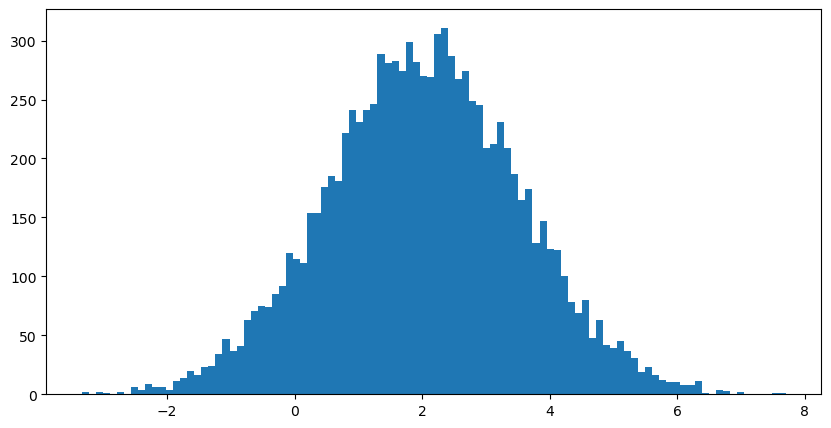

In [9]:
pl.hist(x_data,bins=100) # changes it to have 100bins
pl.show()

Entries  [   5.   21.   41.  117.  259.  446.  710. 1060. 1340. 1394. 1445. 1146.
  863.  570.  302.  171.   71.   28.    9.    2.]
Bins [-3.34304052 -2.79045547 -2.23787042 -1.68528537 -1.13270032 -0.58011527
 -0.02753022  0.52505483  1.07763988  1.63022493  2.18280998  2.73539503
  3.28798008  3.84056513  4.39315019  4.94573524  5.49832029  6.05090534
  6.60349039  7.15607544  7.70866049] 21


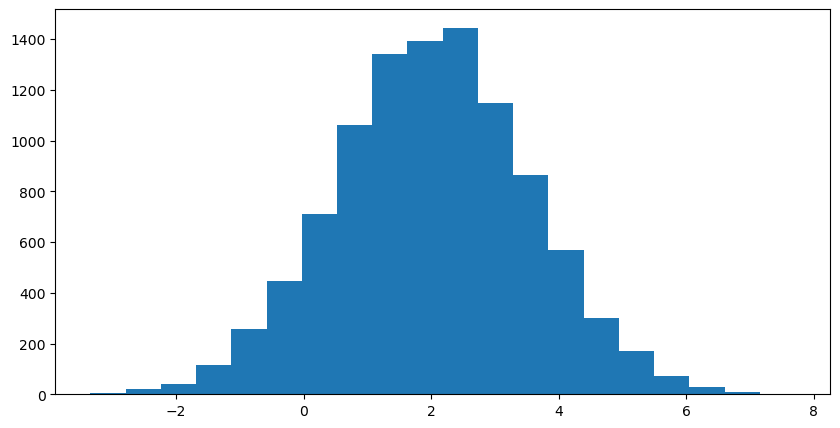

In [10]:
x,bins,patches=pl.hist(x_data,bins=20) # you can extract the values and bin boundaries
print("Entries ",x)
print("Bins",bins,len(bins)) # note that there are 21 entries because this is a "fence post" problem

Entries  [   0.  913. 8133.  911.   43.]


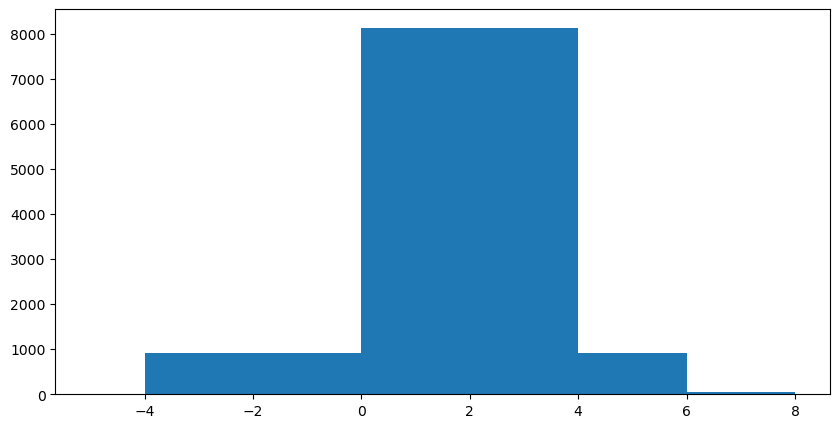

In [11]:
bins=[-5,-4,0,4,6,8]
x,bins,patches=pl.hist(x_data,bins=bins) # you can have any binning that you want
print("Entries ",x)

You plot two histograms on top of each other and change the transparency by changing "alpha"

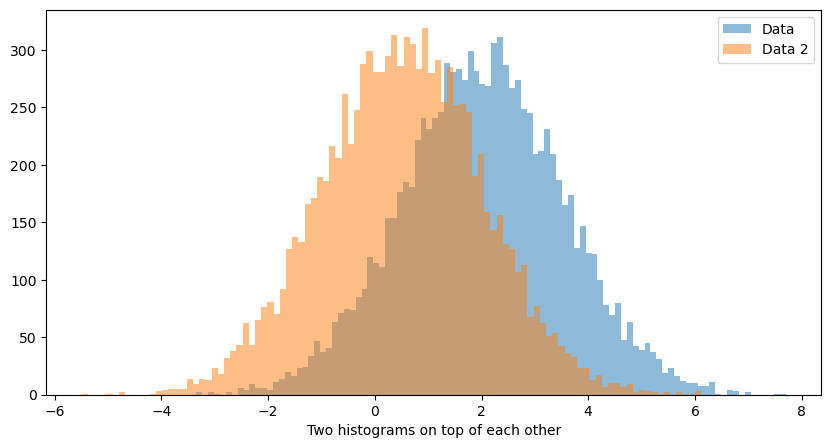

In [12]:
x_data2=npr.normal(loc=0.5,scale=1.5,size=10000)
pl.hist(x_data,bins=100,alpha=0.5,label="Data")
pl.hist(x_data2,bins=100,alpha=0.5,label="Data 2")
pl.xlabel("Two histograms on top of each other")
pl.legend(loc="best")
pl.show()

Numpy also has a histograming method, however these only produce the numbers and then have to added to matplotlib to be displayed

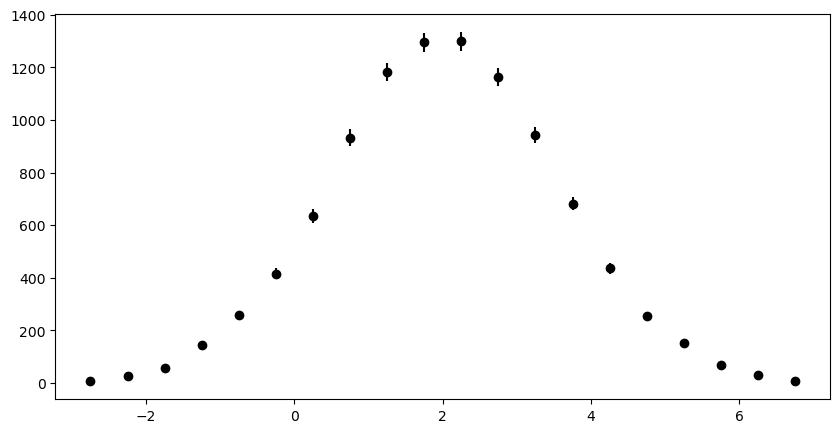

In [13]:
import numpy as np
import matplotlib.pyplot as pl

n,bins=np.histogram(x_data,bins=20,range=[-3,7])
x= 0.5 * (bins[1:] + bins[:-1])
y_err=n**0.5 # Assume Poison distribution
pl.errorbar(x,n,y_err,fmt="ok");